# 1. Ogólny przegląd danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('iris.csv', sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


10 losowych wierszy żeby zapoznać się bliżej z danymi.

In [3]:
df.sample(10)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
106,4.9,2.5,4.5,1.7,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica


Dane statystyczne dla kolumn numerycznych.

In [4]:
df.describe().round(2)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


# 2. Analiza brakujących wartości

In [43]:
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

Zbiór danych nie posiada wartości brakujących.

# 3. Analiza pojedynczych zmiennych

Dane statystyczne z podziałem na gatunek irysów.

In [42]:
gatunek_stat = df.groupby('klasa (class)').agg(['min', 'mean', 'median', 'max', 'std']).round(2).T
(
    gatunek_stat.style
    .highlight_max(axis=1, props='color:white;background-color:MediumAquaMarine')
    .highlight_min(axis=1, props='color:white;background-color:CornflowerBlue')
)

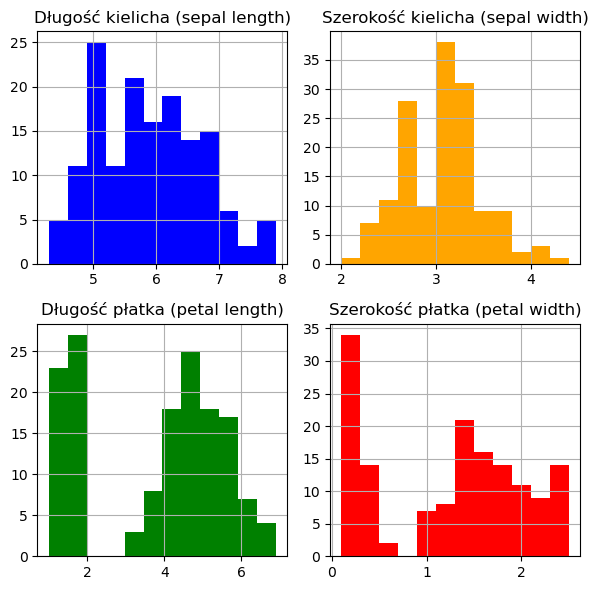

In [44]:
# Tworzenie histogramów dla każdej kolumny osobno.
colors = ['blue', 'orange', 'green', 'red']
b = 12
f = 6

fig, axes = plt.subplots(2, 2, figsize=(f, f))

df['długość kielicha (sepal length)'].hist(ax=axes[0, 0], bins=b, color='blue')
axes[0, 0].set_title('Długość kielicha (sepal length)')

df['szerokość kielicha (sepal width)'].hist(ax=axes[0, 1], bins=b, color='orange')
axes[0, 1].set_title('Szerokość kielicha (sepal width)')

df['długość płatka (petal length)'].hist(ax=axes[1, 0], bins=b, color='green')
axes[1, 0].set_title('Długość płatka (petal length)')

df['szerokość płatka (petal width)'].hist(ax=axes[1, 1], bins=b, color='red')
axes[1, 1].set_title('Szerokość płatka (petal width)')

plt.tight_layout()

plt.show()

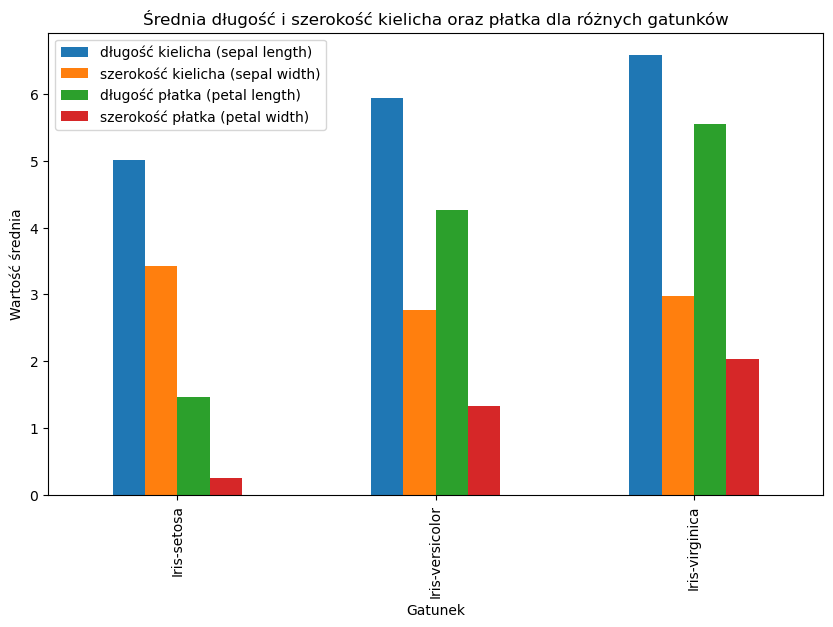

In [14]:
# Średnia długość i szerokość kielicha dla różnych gatunków
mean_values = df.groupby('klasa (class)')[['długość kielicha (sepal length)',
                                           'szerokość kielicha (sepal width)',
                                           'długość płatka (petal length)',
                                           'szerokość płatka (petal width)']].mean()

# Wykres słupkowy na podstawie średnich
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Średnia długość i szerokość kielicha oraz płatka dla różnych gatunków')
plt.ylabel('Wartość średnia')
plt.xlabel('Gatunek')
plt.show()

Na tym etapie możemy po długości i szerokości płatka określić jeden z gatunków irysa - `Setosa`; posiada znacznie mniejsze płatki od pozostałych.

# 4. Analiza relacji między zmiennymi

Korelacja pomiedzy wymiarami.

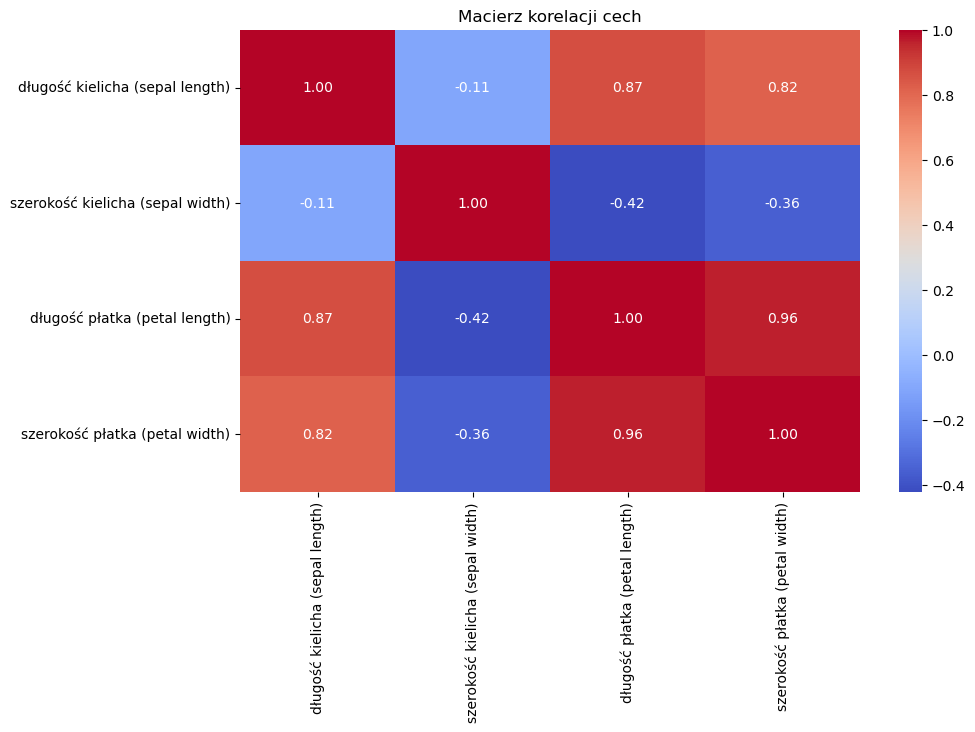

In [30]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji cech')
plt.show()

Wszystkie pary zmiennych i ich relacje w całym zbiorze danych.

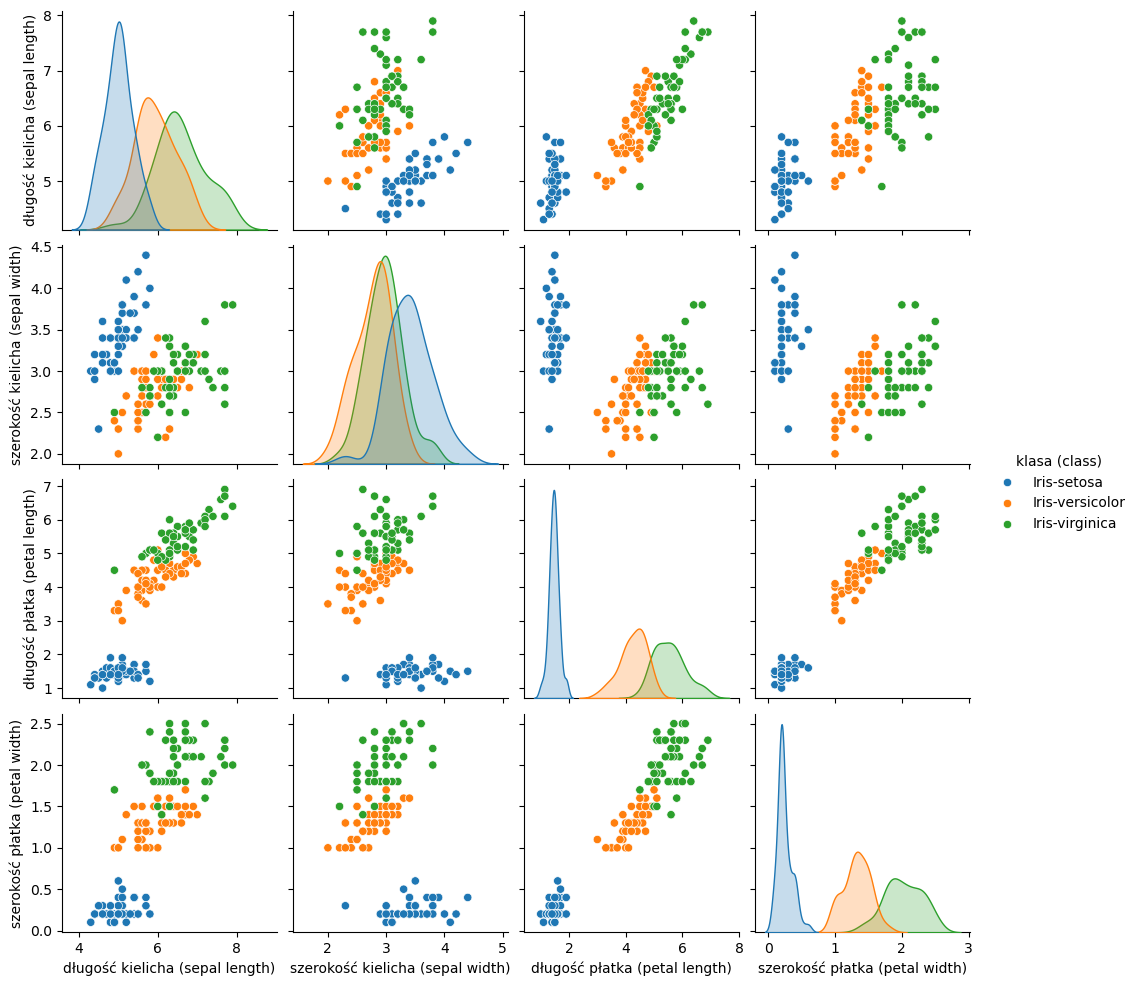

In [ ]:
sns.pairplot(df, hue='klasa (class)', diag_kind='kde')

* Najsilniejsza korelacja występuję pomiędzy długością i szerokością płatka.
* Silne korelacje występują pomiędzy:
  - długość kielicha i długość płatka
  - długość kielicha i szerokością płatka
* Szerokość kielicha nie koreluje silnie z pozostałymi zmiennymi.

# 5. Analiza wartości odstających

długość kielicha (sepal length)        Axes(0.125,0.11;0.168478x0.77)
długość płatka (petal length)       Axes(0.327174,0.11;0.168478x0.77)
szerokość kielicha (sepal width)    Axes(0.529348,0.11;0.168478x0.77)
szerokość płatka (petal width)      Axes(0.731522,0.11;0.168478x0.77)
dtype: object

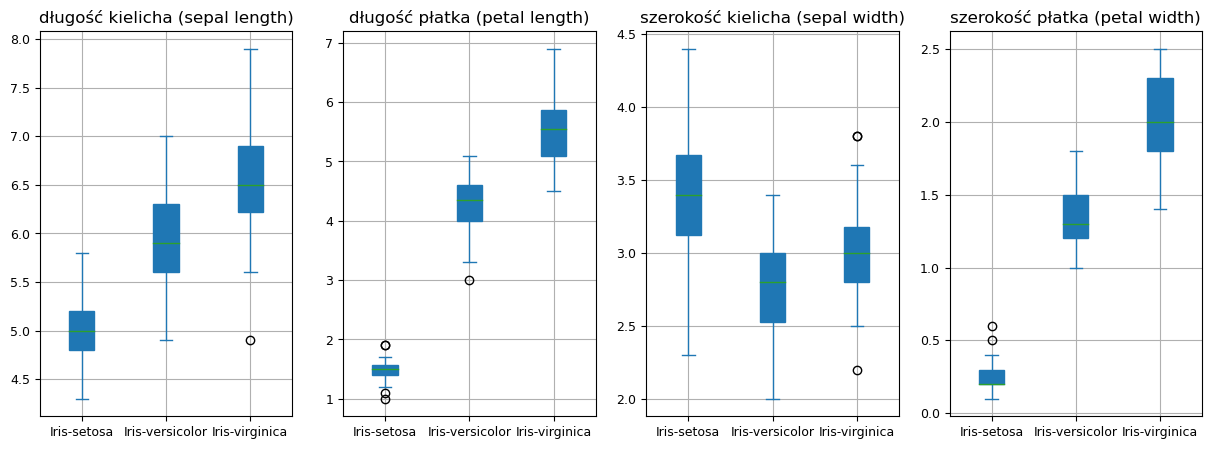

In [51]:
df.plot(kind='box',
        by="klasa (class)",
        column=["długość kielicha (sepal length)",
                "szerokość kielicha (sepal width)",
                "długość płatka (petal length)",
                "szerokość płatka (petal width)"], 
        fontsize= 9,
        figsize=(15, 5),
        layout=(1, 4),
        grid=True,
        patch_artist=True
       )

# 6. Podsumowanie analizy danych dotyczących irysów

* Najsilniejsza korelacja występuje pomiędzy długością a szerokością płatka, co sugeruje, że te dwie cechy są mocno powiązane.
* Istnieją również silne korelacje pomiędzy:
  - długością kielicha a długością płatka,
  - długością kielicha a szerokością płatka.
* Szerokość kielicha wykazuje słabe korelacje z pozostałymi zmiennymi, co oznacza, że ta cecha nie wnosi zbyt wielu informacji w kontekście analizy innych cech.
* Na podstawie analizy długości i szerokości płatka, `Iris-Setosa` jest wyraźnie odróżnialna od pozostałych gatunków. Ten gatunek charakteryzuje się znacznie mniejszymi płatkami, co czyni go łatwym do rozróżnienia.
* `Iris-Virginica` charakteryzuje się największą szerokością i długością płatka.
* Zakresy cech `Iris-Virginica` i `Iris-Versicolor` częściowo się pokrywają, co utrudnia ich rozróżnienie na podstawie pojedynczych cech.